When the car is in the same position of the reference trajectory the steer must be maintained to let the car turning

In [2]:
from sklearn.linear_model import LinearRegression, Ridge
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pickle

In [3]:
ref = pd.read_csv('../demonstrations/extracted_features/ref_traj.csv')

In [4]:
def delta_yaw(r, c):
    if c < - (np.pi / 2) and r > 0:
        c = c + 2 * np.pi
    if r < - (np.pi / 2) and c > 0:
        r = r + 2 * np.pi
    return r - c

In [15]:
y = ref['Steer'].values[20:].reshape(-1, 1)

In [9]:
x_df = pd.concat([ref['yaw'].shift(-10), ref['yaw']], axis=1)
x_df.columns = ['next', 'prev']
x_df = x_df[:-10]
x10 = x_df.apply(lambda x: delta_yaw(x['next'], x['prev']), axis=1).values


x_df = pd.concat([ref['yaw'].shift(-20), ref['yaw']], axis=1)
x_df.columns = ['next', 'prev']
x_df = x_df[:-20]
x20 = x_df.apply(lambda x: delta_yaw(x['next'], x['prev']), axis=1).values

x_df = pd.concat([ref['yaw'].shift(-30), ref['yaw']], axis=1)
x_df.columns = ['next', 'prev']
x_df = x_df[:-30]
x30 = x_df.apply(lambda x: delta_yaw(x['next'], x['prev']), axis=1).values

x_df = pd.concat([ref['yaw'].shift(-40), ref['yaw']], axis=1)
x_df.columns = ['next', 'prev']
x_df = x_df[:-40]
x40 = x_df.apply(lambda x: delta_yaw(x['next'], x['prev']), axis=1).values

Text(0, 0.5, 'Steer')

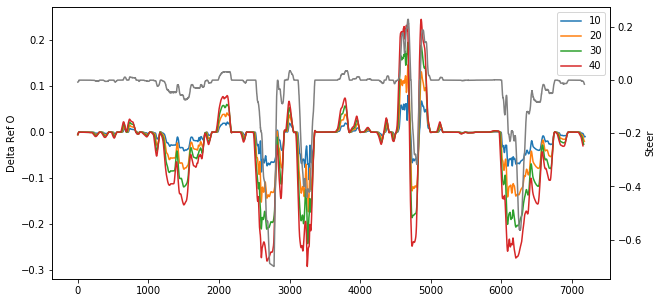

In [78]:
"""plt.figure(figsize=(15,10))
plt.scatter(ref['xCarWorld'], ref['yCarWorld'], c='lightgray', alpha=0.1)
plt.scatter(ref['xCarWorld'].values[:-20],
            ref['yCarWorld'].values[:-20], s=2, c=x.ravel(), vmin=-0.01, vmax=0.01)
plt.title('delta ref O')
plt.colorbar()"""

plt.figure(figsize=(10,5))
plt.plot(x10, label='10')
plt.plot(x20, label='20');
plt.plot(x30, label='30');
plt.plot(x40, label='40')
plt.ylabel('Delta Ref O')
plt.legend()
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(ref['Steer'].values[:-20], 'gray')
ax2.set_ylabel('Steer')

In [10]:
steer = ref['Steer'].values
prev_steer = ref.shift(1, fill_value=0)['Steer'].values

gamma = 116

In [14]:
shat = prev_steer[:-21] + 0.25 * (np.tanh(gamma * x20[1:]) - np.tanh(gamma * x20[:-1]))

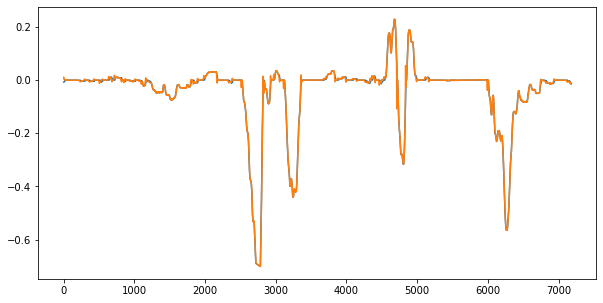

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(steer[:-21])
plt.plot(shat);

In [37]:
ref.columns

Index(['curLapTime', 'Dist', 'Acceleration_x', 'Acceleration_y', 'Gear', 'rpm',
       'speed_x', 'speed_y', 'speed_z', 'dist_to_middle', 'xCarWorld',
       'yCarWorld', 'z', 'roll', 'pitch', 'yaw', 'speedGlobalX',
       'speedGlobalY', 'Steer', 'Throttle', 'Brake', 'NLap', 'is_partial',
       'isReference', 'trackPos'],
      dtype='object')

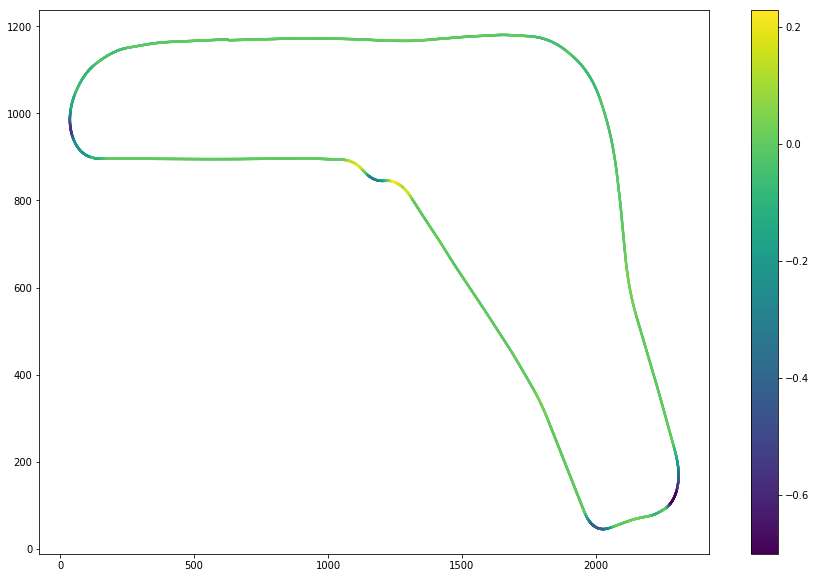

In [63]:
plt.figure(figsize=(15,10))
plt.scatter(ref['xCarWorld'].values[1:], ref['yCarWorld'].values[1:], s=2, c=ref['Steer'].values[1:])
plt.colorbar()

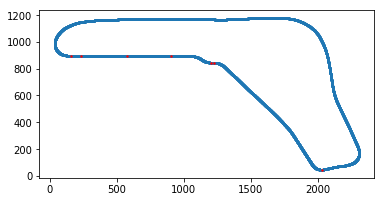

In [95]:
plt.figure(figsize=(10,10))
plt.scatter(ref['xCarWorld'].values[1:], ref['yCarWorld'].values[1:], s=2)
plt.scatter(ref['xCarWorld'].values[1:][strange_ids], ref['yCarWorld'].values[1:][strange_ids], s=2, c='r')
plt.gca().set_aspect('equal')

(-0.02, 0.02)

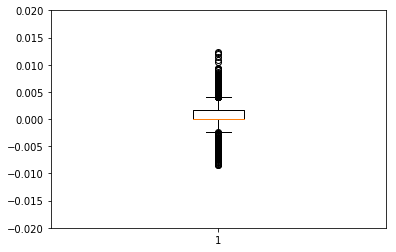

In [64]:
plt.boxplot(x.reshape(-1, 1));
plt.ylim([-0.02,0.02])

In [65]:
y.shape

(7199, 1)

In [69]:
x.shape

(7199, 1)

In [44]:
x_data.shape

(2989,)

In [45]:
y_data.shape

(2989, 1)

In [46]:
x_data = x.copy()
x_data = x_data[1:].reshape(-1, 1)
y_data = y.copy()
y_data = y_data[1:] - y_data[:-1]

data = pd.DataFrame(np.concatenate([x_data, y_data], axis=1), columns=['x', 'y'])

In [47]:
data = data.sample(frac=1)

In [48]:
x = data['x'].values.reshape(-1, 1)
y = data['y'].values.reshape(-1, 1)

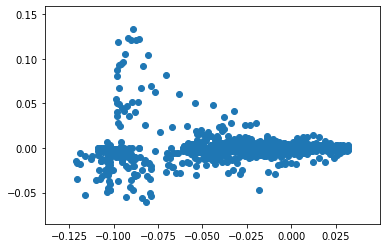

In [50]:
plt.scatter(x, np.arctanh(4*y));

In [51]:
np.sqrt(
    -cross_val_score(LinearRegression(fit_intercept=False), x, np.arctanh(4*y), cv=10,
                     scoring='neg_mean_squared_error'))

array([0.01450036, 0.00792469, 0.01304298, 0.00613619, 0.01248216,
       0.00809367, 0.00945133, 0.00863773, 0.01309092, 0.00901889])

In [52]:
lm = LinearRegression(fit_intercept=False).fit(x, np.arctanh(4*y))

In [53]:
lm.coef_

array([[-0.00551897]])

In [16]:
traj = pd.read_csv('../demonstrations/forza_ow2020_3_23.csv')

In [17]:
traj.columns

Index(['time', 'Dist', 'Ax', 'Ay', 'Gear', 'rpm', 'Speed_x', 'Speed_y',
       'Speed_z', 'trk_to_middle', 'trk_width', 'X', 'Y', 'Z', 'roll', 'pitch',
       'yaw', 'speedGlobalX', 'speedGlobalY', 'angle', 'track_angle', 'Steer',
       'Throttle', 'Brake'],
      dtype='object')

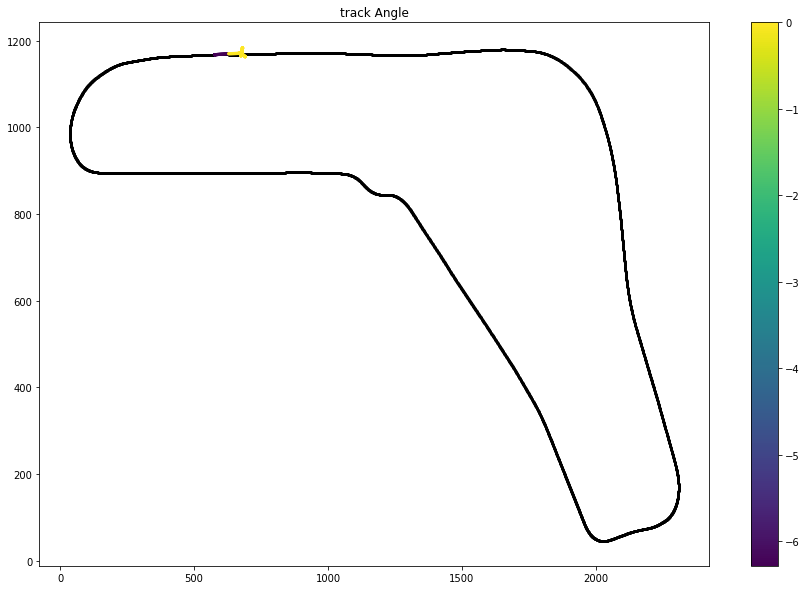

In [19]:
%matplotlib inline
plt.figure(figsize=(15, 10))
plt.scatter(ref['xCarWorld'].values[1:], ref['yCarWorld'].values[1:], s=2, c='k')
plt.scatter(traj['X'], traj['Y'], s=5, c=traj['track_angle'])
plt.colorbar();
plt.title('track Angle');

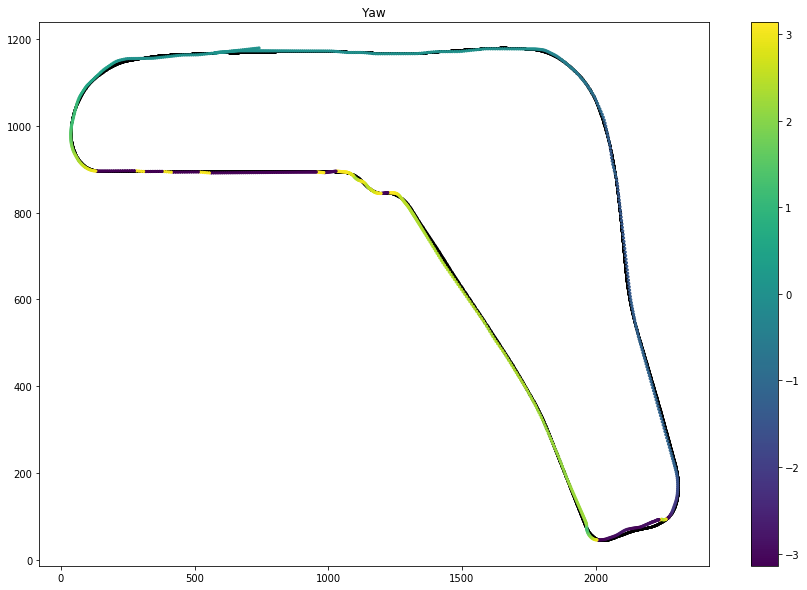

In [145]:
plt.figure(figsize=(15, 10))
plt.scatter(ref['xCarWorld'].values[1:], ref['yCarWorld'].values[1:], s=2, c='k')
plt.scatter(traj['X'], traj['Y'], s=5, c=traj['yaw'])
plt.colorbar();
plt.title('Yaw');

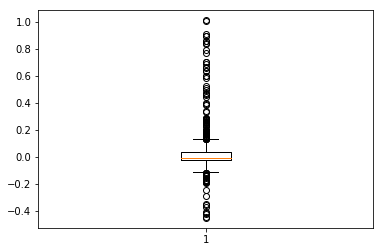

In [154]:
plt.boxplot(traj['angle'].values);

<IPython.core.display.Javascript object>


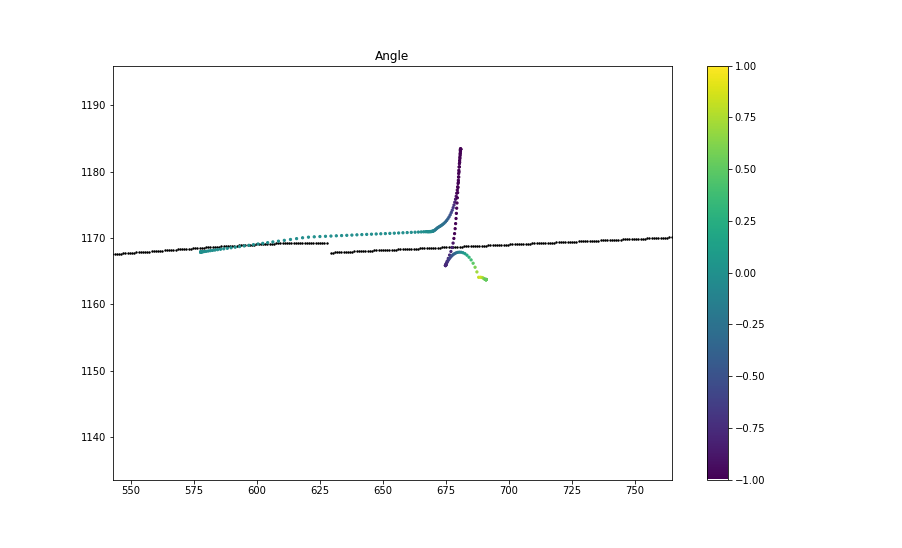

In [22]:
%matplotlib notebook
#plt.figure(figsize=(15, 10))
plt.figure()
plt.scatter(ref['xCarWorld'].values[1:], ref['yCarWorld'].values[1:], s=2, c='k')
plt.scatter(traj['X'], traj['Y'], s=5, c=traj['angle'], vmin=-1, vmax=1)
plt.colorbar();
plt.title('Angle');

<IPython.core.display.Javascript object>


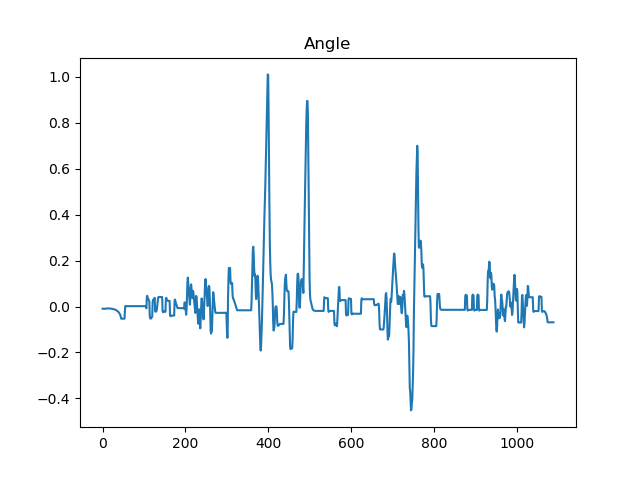

In [13]:
%matplotlib notebook
#plt.figure(figsize=(15, 10))
plt.figure()

plt.plot(traj['angle'])

plt.title('Angle');

In [155]:
ref.columns

Index(['curLapTime', 'Dist', 'Acceleration_x', 'Acceleration_y', 'Gear', 'rpm',
       'speed_x', 'speed_y', 'speed_z', 'dist_to_middle', 'xCarWorld',
       'yCarWorld', 'z', 'roll', 'pitch', 'yaw', 'speedGlobalX',
       'speedGlobalY', 'Steer', 'Throttle', 'Brake', 'NLap', 'is_partial',
       'isReference', 'trackPos'],
      dtype='object')

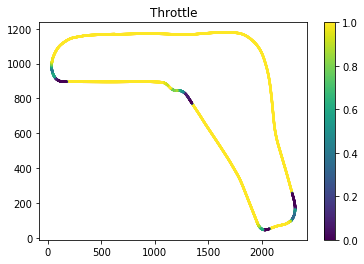

In [157]:
%matplotlib inline
#plt.figure(figsize=(15, 10))
plt.figure()
plt.scatter(ref['xCarWorld'].values[1:], ref['yCarWorld'].values[1:], s=2,c=ref['Throttle'].values[1:])
plt.colorbar();
plt.title('Throttle');

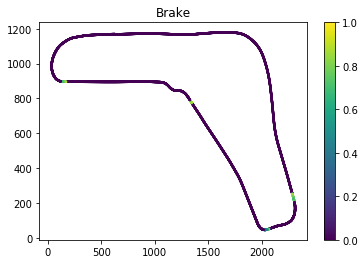

In [158]:
%matplotlib inline
#plt.figure(figsize=(15, 10))
plt.figure()
plt.scatter(ref['xCarWorld'].values[1:], ref['yCarWorld'].values[1:], s=2,c=ref['Brake'].values[1:])
plt.colorbar();
plt.title('Brake');

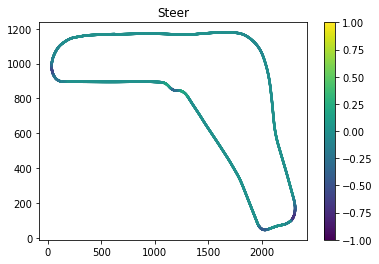

In [161]:
%matplotlib inline
#plt.figure(figsize=(15, 10))
plt.figure()
plt.scatter(ref['xCarWorld'].values[1:], ref['yCarWorld'].values[1:], s=2, c=ref['Steer'].values[1:], vmin=-1, vmax=1)
plt.colorbar();
plt.title('Steer');

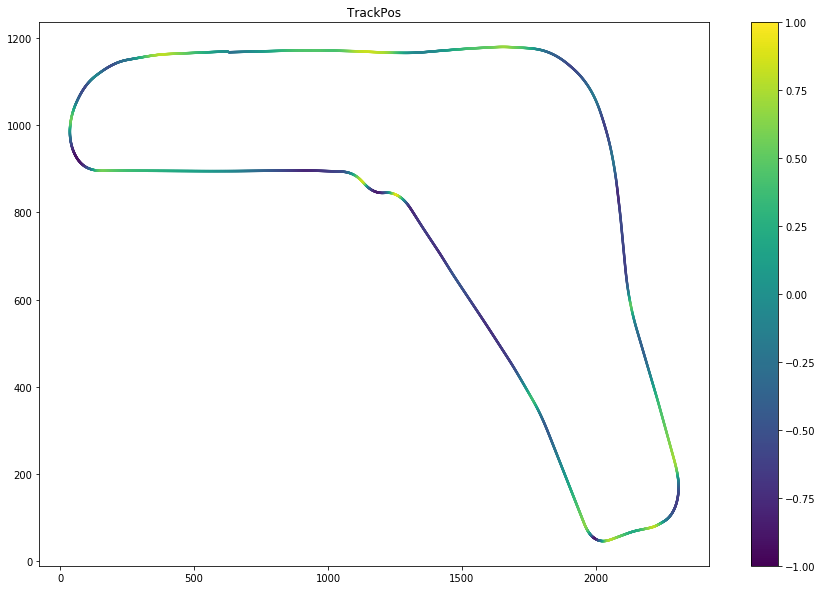

In [166]:
%matplotlib inline
plt.figure(figsize=(15, 10))
plt.scatter(ref['xCarWorld'].values[1:], ref['yCarWorld'].values[1:], s=2, c=ref['trackPos'].values[1:], vmin=-1, vmax=1)
plt.colorbar();
plt.title('TrackPos');

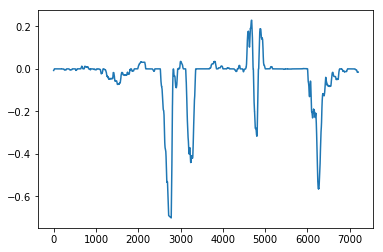

In [163]:
plt.plot(ref['Steer'].values[1:])

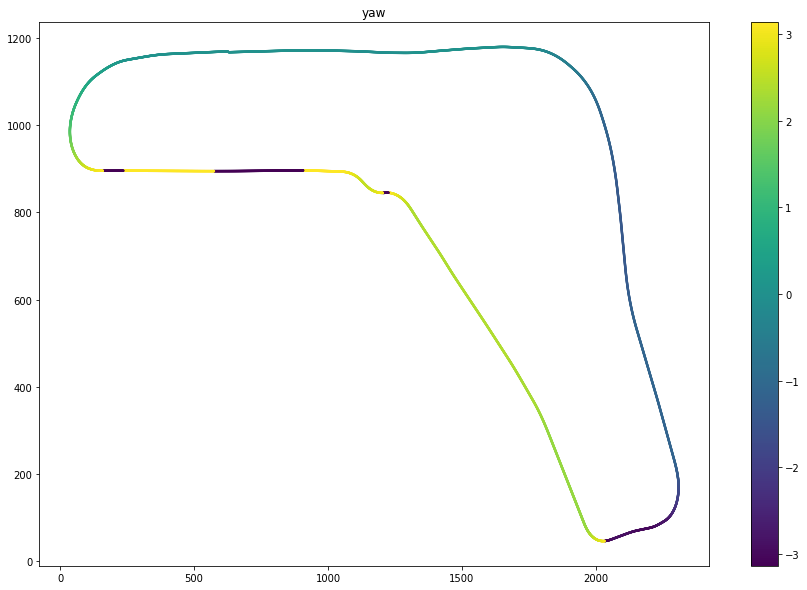

In [188]:
%matplotlib inline
plt.figure(figsize=(15, 10))
plt.scatter(ref['xCarWorld'].values[1:], ref['yCarWorld'].values[1:], s=2,c=ref['yaw'].values[1:])
plt.colorbar();
plt.title('yaw');

# Episode analysis

In [17]:
episode = pickle.load(open('../episode.pkl', 'rb'))
#episode = [episode[i] for i in range(0, len(episode), 25)]

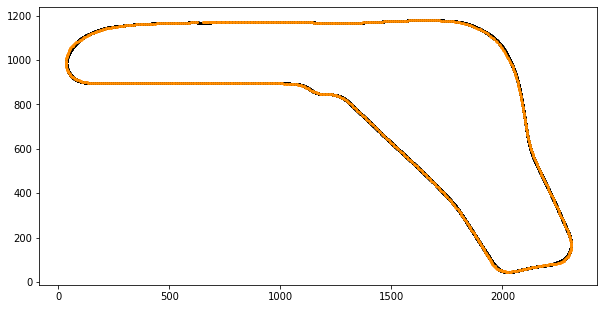

In [63]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.scatter(ref['xCarWorld'], ref['yCarWorld'], c='k', s=4)
plt.gca().set_aspect('equal');
for ob in episode:
    plt.scatter(ob['x'], ob['y'], c='darkorange', s=4)

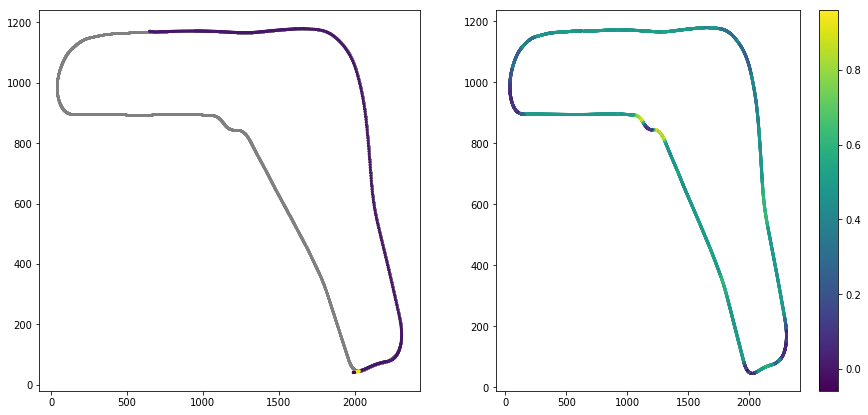

In [222]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
ax1.scatter(ref['xCarWorld'], ref['yCarWorld'], c='gray', s=2)
#plt.gca().set_aspect('equal');

x = [ob['x'] for ob in episode]
y = [ob['y'] for ob in episode]
s = [ob['delta_O'] for ob in episode]
p = ax1.scatter(x, y, c=s, s=4)
plt.colorbar(p);

#ax2.scatter(ref['xCarWorld'].values[20:], ref['yCarWorld'].values[20:],
#            c=ref['yaw'].values[20:] - ref['yaw'].values[:-20], s=4, vmin=-1, vmax=1)
ax2.scatter(ref['xCarWorld'].values[20:], ref['yCarWorld'].values[20:],
            c=yaw_clip(ref['yaw'].values[20:], ref['yaw'].values[:-20]), s=4)

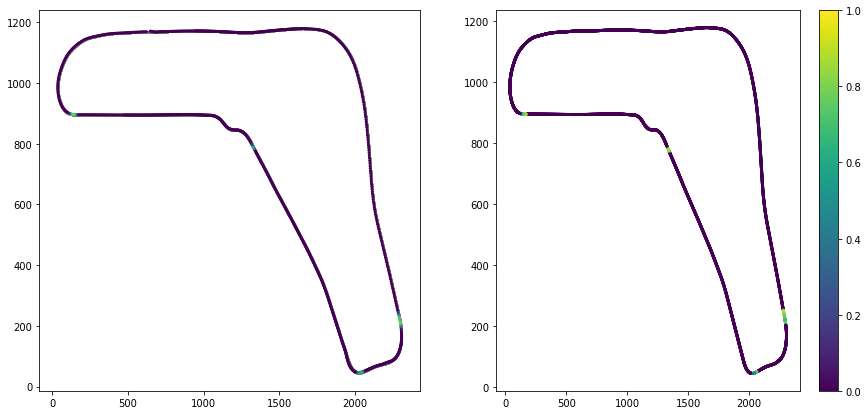

In [257]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
ax1.scatter(ref['xCarWorld'], ref['yCarWorld'], c='gray', s=2)
#plt.gca().set_aspect('equal');

x = [ob['x'] for ob in episode]
y = [ob['y'] for ob in episode]
s = [ob['brake'] for ob in episode]
p = ax1.scatter(x, y, c=s, s=4, vmin=0, vmax=1)
plt.colorbar(p);

ax2.scatter(ref['xCarWorld'], ref['yCarWorld'], c=ref['Brake'], s=4, vmin=0, vmax=1)

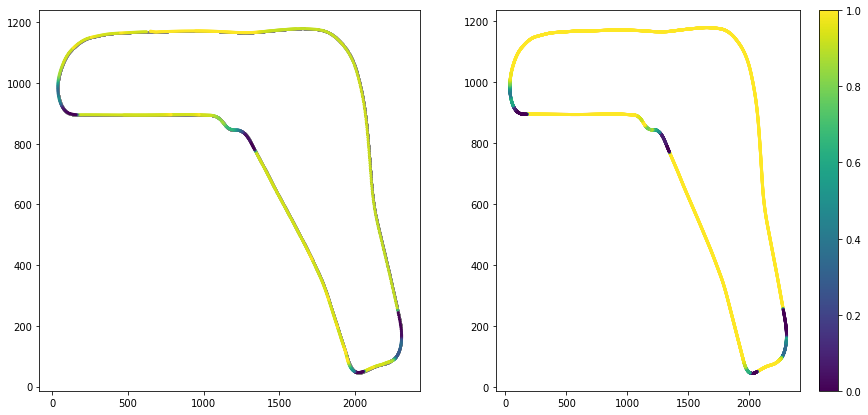

In [258]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
ax1.scatter(ref['xCarWorld'], ref['yCarWorld'], c='gray', s=2)
#plt.gca().set_aspect('equal');

x = [ob['x'] for ob in episode]
y = [ob['y'] for ob in episode]
s = [ob['throttle'] for ob in episode]
p = ax1.scatter(x, y, c=s, s=4, vmin=0, vmax=1)
plt.colorbar(p);

ax2.scatter(ref['xCarWorld'], ref['yCarWorld'], c=ref['Throttle'], s=4, vmin=0, vmax=1)

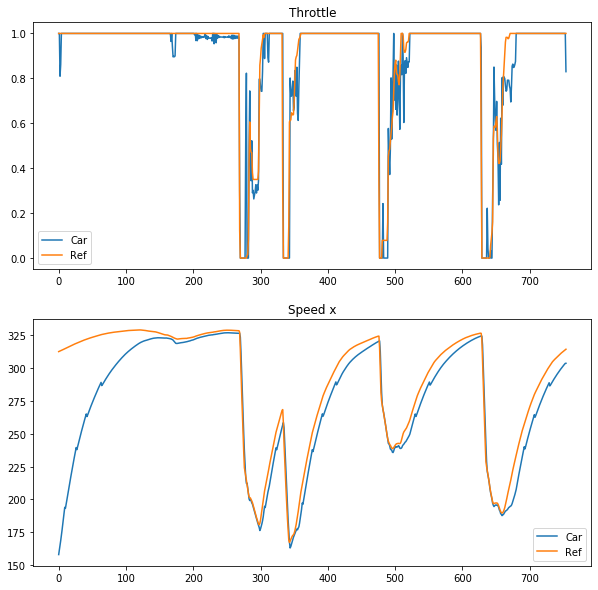

In [65]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
ax1.plot([ob['throttle'] for ob in episode], label='Car')
ax1.plot([ref['Throttle'][ob['ref_id']] for ob in episode], label='Ref')
ax1.set_title('Throttle')
ax1.legend()
ax2.plot([ob['speed_x'] for ob in episode], label='Car')
ax2.plot([ref['speed_x'][ob['ref_id']] for ob in episode], label='Ref')
ax2.legend()
ax2.set_title('Speed x');

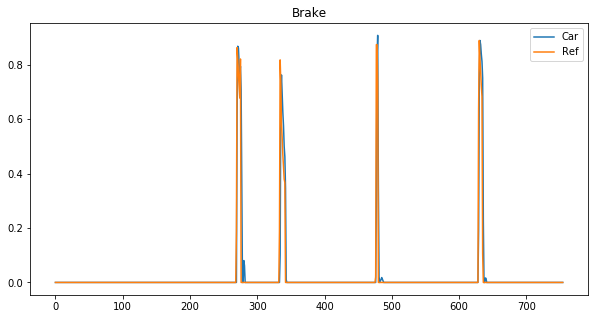

In [22]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.plot([ob['brake'] for ob in episode], label='Car')
ax1.plot([ref['Brake'][ob['ref_id']] for ob in episode], label='Ref')
ax1.set_title('Brake')
ax1.legend();

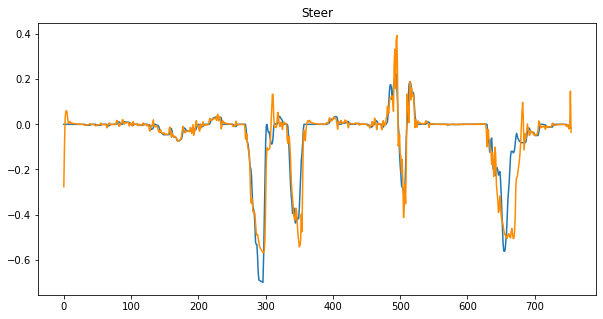

In [18]:
plt.figure(figsize=(10,5))
plt.plot([ref['Steer'][ob['ref_id']] for ob in episode])
ax = plt.gca()
ax.plot([ob['steer'] for ob in episode], 'darkorange')
plt.title('Steer');

In [ ]:
plt.figure(figsize=(10,5))
#plt.plot([ref['Steer'][ob['ref_id']] for ob in episode])
plt.plot([ob['steer'] for ob in episode], label='Steer')
plt.plot([ob['trackangle'] for ob in episode], label='Track angle')

In [10]:
steer = ref['Steer'].values
prev_steer = ref.shift(1, fill_value=0)['Steer'].values

gamma = 116
shat = prev_steer[:-21] + 0.25 * (np.tanh(gamma * x20[1:]) - np.tanh(gamma * x20[:-1]))
plt.figure(figsize=(10, 5))
plt.plot(steer[:-21])
plt.plot(shat);

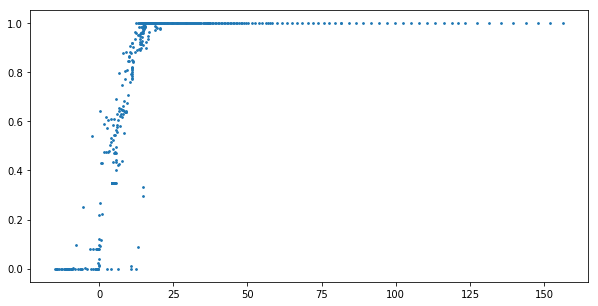

In [278]:
plt.figure(figsize=(10, 5))
plt.scatter([ob['vr'] - ob['v'] for ob in episode], [ref['Throttle'][ob['ref_id']] for ob in episode], s=3)

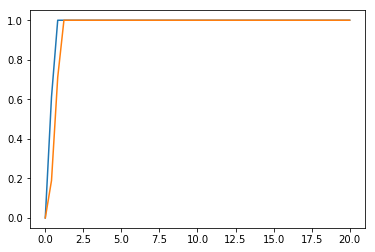

In [334]:
delta = np.linspace(0, 20)
plt.plot(delta, [max(0, min(1.5*d, 1)) for d in delta])
plt.plot(delta, [max(0, min(0.055*d + 1*d**2, 1)) for d in delta])
#plt.plot(delta, 1 - np.exp(-delta))
#plt.plot(delta, 1 - np.exp(-delta * 1.5))

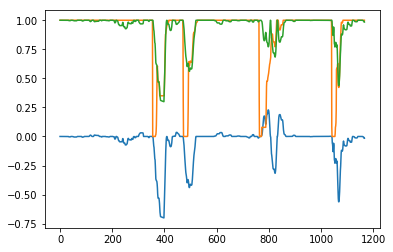

In [345]:
plt.plot([ob['steer_r'] for ob in episode])
plt.plot([ref['Throttle'][ob['ref_id']] for ob in episode])
plt.plot([1 - abs(ob['steer_r']) for ob in episode])

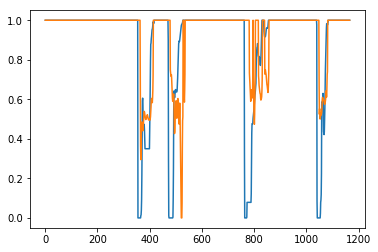

In [374]:
plt.plot([ref['Throttle'][ob['ref_id']] for ob in episode])

speed_y = np.array([abs(ob['speed_y']) for ob in episode])
speed_y[abs(speed_y) < 5] = 0 
thr = np.array([ref['Throttle'][ob['ref_id']] for ob in episode])#np.array([ob['throttle'] for ob in episode])

#plt.plot([ref['Throttle'][ob['ref_id']] for ob in episode])
hat = np.ones(speed_y.shape) - (speed_y * 0.05)
hat[hat<0] = 0
plt.plot(hat)
ax = plt.gca()
#ax2 = plt.twinx()
#ax2.plot([ref['speed_y'][ob['ref_id']] for ob in episode], 'darkorange')

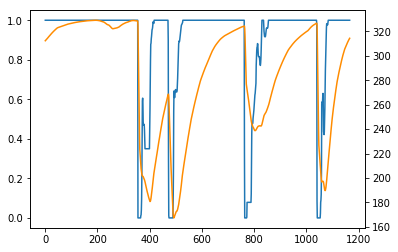

In [350]:
plt.plot([ref['Throttle'][ob['ref_id']] for ob in episode])
ax = plt.gca()
ax2 = plt.twinx()
ax2.plot([ref['speed_x'][ob['ref_id']] for ob in episode], 'darkorange')

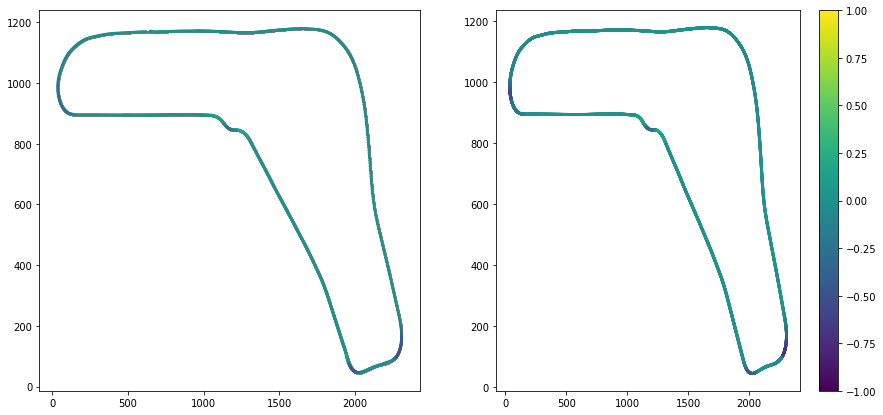

In [259]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
ax1.scatter(ref['xCarWorld'], ref['yCarWorld'], c='gray', s=2)
#plt.gca().set_aspect('equal');

x = [ob['x'] for ob in episode]
y = [ob['y'] for ob in episode]
s = [ob['steer'] for ob in episode]
p = ax1.scatter(x, y, c=s, s=4, vmin=-1, vmax=1)
plt.colorbar(p);

ax2.scatter(ref['xCarWorld'], ref['yCarWorld'], c=ref['Steer'], s=4, vmin=-1, vmax=1)

In [24]:
sim = pickle.load(open('../episode_to_check.pkl', 'rb'))
#sim = [sim[i] for i in range(0, len(sim))]

In [25]:
sim[0]['curLapTime']

array(3.598, dtype=float32)

In [26]:
sim[1]['curLapTime']

array(3.698, dtype=float32)

In [27]:
sim[2]['curLapTime']

array(3.798, dtype=float32)

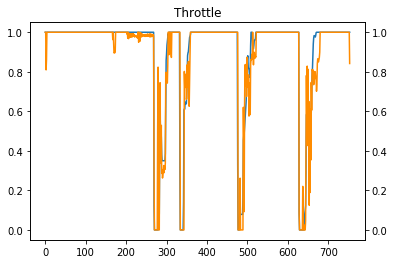

In [28]:
plt.plot([ref['Throttle'][ob['ref_id']] for ob in sim])
ax = plt.gca()
ax2 = plt.twinx()
ax2.plot([ob['throttle'] for ob in sim], 'darkorange')
plt.title('Throttle');

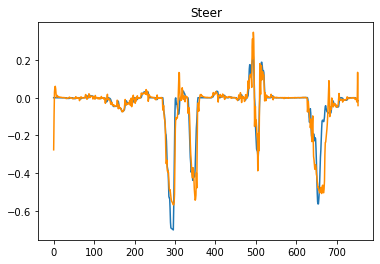

In [29]:
plt.plot([ref['Steer'][ob['ref_id']] for ob in sim])
ax = plt.gca()
ax.plot([ob['steer'] for ob in sim], 'darkorange')
plt.title('Steer');

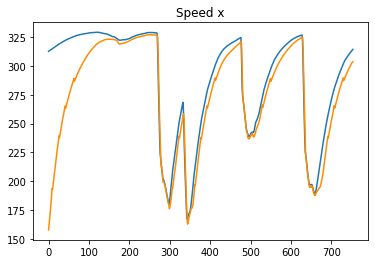

In [30]:
plt.plot([ref['speed_x'][ob['ref_id']] for ob in sim])
ax = plt.gca()
ax.plot([ob['speed_x'] for ob in sim], 'darkorange')
plt.title('Speed x');

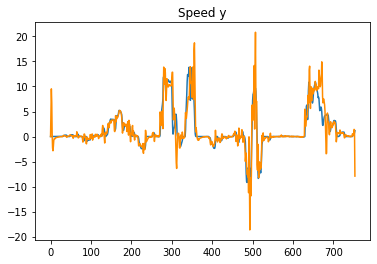

In [31]:
plt.plot([ref['speed_y'][ob['ref_id']] for ob in sim])
ax = plt.gca()
ax.plot([ob['speed_y'] for ob in sim], 'darkorange')
plt.title('Speed y');

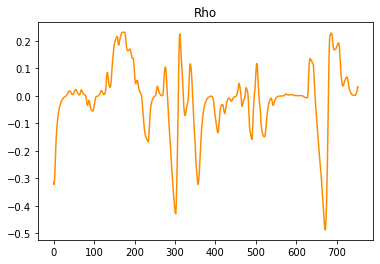

In [32]:
plt.plot([ob['rho'] for ob in sim], 'darkorange')
plt.title('Rho');

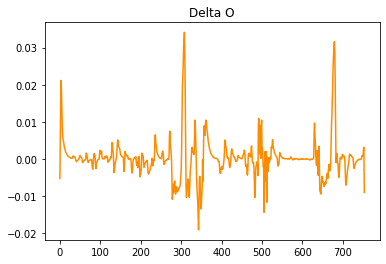

In [33]:
plt.plot([ob['delta_O'] for ob in sim], 'darkorange')
plt.title('Delta O');

In [43]:
np.argmax([sim[i]['track_angle'] - sim[i-1]['track_angle'] for i,ob in enumerate(sim[1:])])

0

In [46]:
sim[2]['track_angle'] - sim[1]['track_angle']

0.0

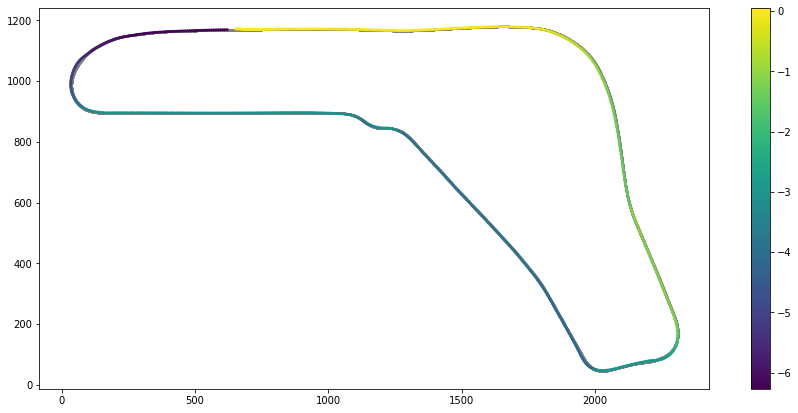

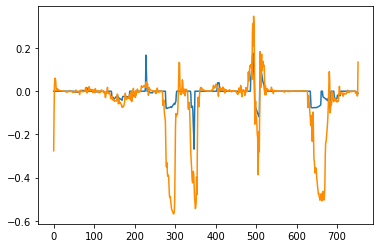

In [51]:
plt.figure(figsize=(15,7))
plt.scatter(ref['xCarWorld'], ref['yCarWorld'], c='gray', s=2)
#plt.gca().set_aspect('equal');

x = [ob['x'] for ob in sim]
y = [ob['y'] for ob in sim]
a = [ob['track_angle'] for ob in sim]
p = plt.scatter(x, y, c=a, s=4)
plt.colorbar(p);

plt.figure()
delta_track_angle = [sim[i+1]['track_angle'] - sim[i]['track_angle'] for i in range(len(sim)-1)]
plt.plot(delta_track_angle, label='track Angle')
plt.plot([ob['steer'] for ob in sim[:-1]], 'darkorange')

In [83]:
def yaw_proj(x0, x1, delta):
    x0 = x0.copy()
    x1 = x1.copy()
    x0_sign = 1 if x0 >= 0 else -1
    x1_sign = 1 if x1 >= 0 else -1
    if abs(x0) > np.pi / 2 and abs(x1) > np.pi / 2 and ((x0_sign * x1_sign) < 0):
        if x0 < 0:
            x0 = 2 * np.pi + x0
        if x1 < 0:
            x1 = 2 * np.pi + x1
    return (1 - delta) * x0 + delta * x1

In [84]:
yaw_proj(ref['yaw'].values[sim[2805]['ref_id']], ref['yaw'].values[sim[2805]['ref_id']+1], sim[2805]['delta'])

-1.577725277058178

In [76]:
sim[2805]['yaw']

array(-1.54354, dtype=float32)

In [77]:
sim[2805]['delta']

0.8194419459856503

In [78]:
ref['yaw'].values[sim[2805]['ref_id']]

-1.572934

In [79]:
ref['yaw'].values[sim[2805]['ref_id']+1]

-1.578781

In [33]:
ref['yaw'].values[sim[3372]['ref_id']] - sim[3372]['yaw']

-0.023724041656494332

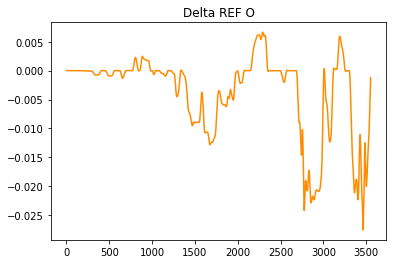

In [21]:
plt.plot([ob['delta_ref_O'] for ob in sim], 'darkorange')
plt.title('Delta REF O');

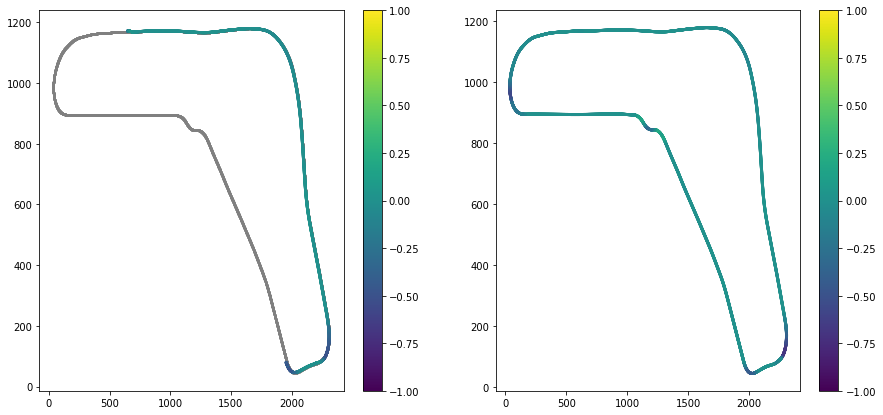

In [28]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
ax1.scatter(ref['xCarWorld'], ref['yCarWorld'], c='gray', s=2, vmin=-1, vmax=1)
#plt.gca().set_aspect('equal');

x = [ob['x'] for ob in sim]
y = [ob['y'] for ob in sim]
s = [ob['steer'] for ob in sim]
p = ax1.scatter(x, y, c=s, s=4,  vmin=-1, vmax=1)
plt.colorbar(p, ax=ax1);

p = ax2.scatter(ref['xCarWorld'], ref['yCarWorld'], c=ref['Steer'], s=4,  vmin=-1, vmax=1)
plt.colorbar(p, ax=ax2);

In [420]:
sim[467]['delta_O']

0.26932215196416537

In [421]:
sim[467]['rho']

0.0823886762456833

In [422]:
sim[467]['delta_ref_O']

-0.020102113976371388

In [99]:
sim[0]['curLapTime']

array(3.348, dtype=float32)

In [100]:
sim[1]['curLapTime']

array(3.358, dtype=float32)

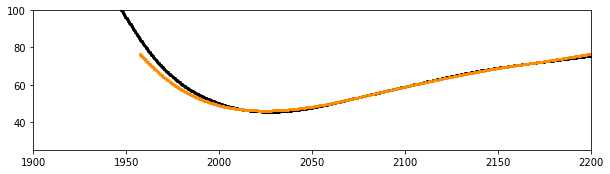

In [116]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.scatter(ref['xCarWorld'], ref['yCarWorld'], c='k', s=4)
plt.gca().set_aspect('equal');
plt.xlim([1900, 2200])
plt.ylim([25, 100])
for ob in sim:
    plt.scatter(ob['x'], ob['y'], c='darkorange', s=4)

In [8]:
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]).reshape(-1, 1)
y = np.array([63, 96, 162, 194, 225, 250, 268, 286, 305, 330]).reshape(-1, 1)

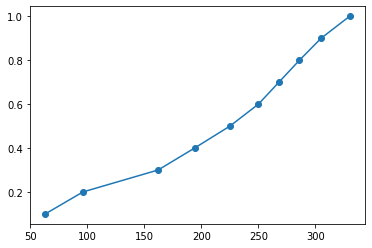

In [5]:
plt.plot(y, x, 'o-')

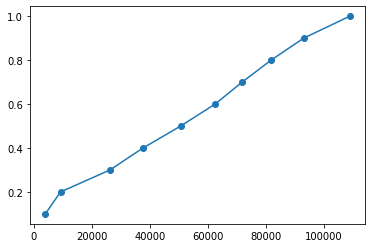

In [6]:
plt.plot(y**2, x, 'o-')

In [30]:
mod = LinearRegression(fit_intercept=True).fit(y**2, x)

In [31]:
mod.intercept_

array([0.0837069])

In [33]:
mod.coef_

array([[8.54431362e-06]])

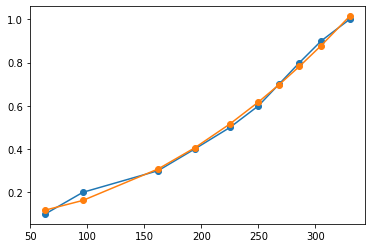

In [34]:
plt.plot(y, x, 'o-')
plt.plot(y, mod.predict(y**2), 'o-')